In [1]:
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
def inverse_sample_decorator(dist):
    def wrapper(pnts, x_min=-100, x_max=100, n=1e5, **kwargs):
        x = np.linspace(x_min, x_max, int(n))
        cumulative = np.cumsum(dist(x, **kwargs))
        real_low = (cumulative/cumulative.max()).min()
        real_high = (cumulative/cumulative.max()).max()
        #print((cumulative/cumulative.max()).max(),(cumulative/cumulative.max()).min())
        f = interp1d(cumulative/cumulative.max(), x)
        return f(np.random.uniform(low=real_low, high=real_high, size=pnts))
    return wrapper

In [3]:
# First trying sampling from a simple gaussian distribution
@inverse_sample_decorator
def gauss(x, amp=1.0, mean=0.0, std=0.2):
    return amp*np.exp(-(x-mean)**2/std**2/2.0)

In [4]:
samples = gauss(5000, mean=20, std=0.8, x_min=19, x_max=21)

In [5]:
x = gauss(100000, mean=3.5, std=0.5)
#x = np.random.normal(3.5, 0.5, size=10000)

In [6]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

In [50]:
print(all_samples)

[3.76944404 3.24226434 3.53230106 ... 1.41971411 1.19947636 1.00016833]


In [6]:
# Experimenting with Eq2
@inverse_sample_decorator
def f(x,ts=[1.1,1.2,1.3,1.4]):
    xx = x/(13)**0.5
    v = ts[0] * ((1-xx)**(ts[1])) * (xx**ts[2]) * (xx**(ts[3]*np.log(xx)))
    return v

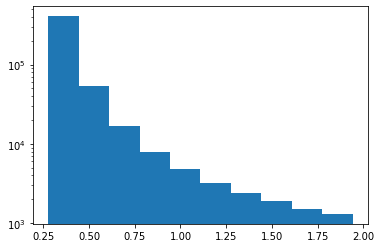

In [7]:
sampless = f(500000,ts=[1.1,1.2,1.3,1.4],x_min=1/(13**0.5),x_max=7/(13**0.5))

plt.hist(sampless, log=True)
plt.show()

[1.39246925 1.14706166 1.87799169 1.8149359 ]
[2.53909382 2.13079011 2.54611104 2.15334194]
[3.49274766 3.07429617 2.40224868 2.5874964 ]
[4.97425412 3.87826053 2.90591202 3.01334552]
[3.67546475 5.10765514 4.08969933 4.82743034]
[5.51210559 6.50713156 3.62299503 4.80225412]


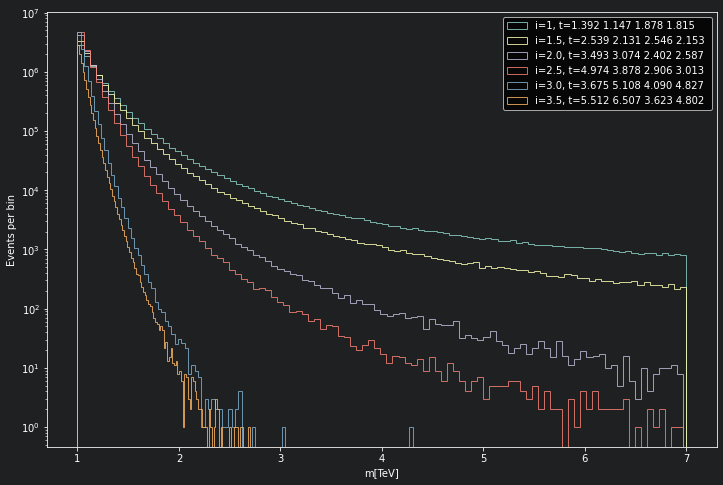

In [8]:
# Varing the theta values
# not sure the range that makes sense
plt.style.use("dark_background")
plt.figure(figsize=(12,8), facecolor='#1e2021')
ax = plt.gca()
ax.set_facecolor('#1e2021')
i = 1
while i != 4:
    tsx = i * np.random.uniform(low=1, high=2, size=4)
    print(tsx)
    strFormat = len(tsx) * '{:.3f} '
    ftsx = strFormat.format(*tsx)
    samplex = f(10000000,ts=tsx,x_min=1/(13**0.5),x_max=7/(13**0.5)) 
    samplex *= (13**0.5)
    plt.hist(samplex, log=True, label="i={}, t={}".format(i,ftsx), histtype="step",
             alpha=0.8, bins=100)
    i += 0.5
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [8]:
samplesa = f(10000000,ts=[1.673,1.455,1.311,1.346],x_min=1/(13**0.5),x_max=7/(13**0.5))
samplesa *= (13**0.5)

In [9]:
samplesb = f(10000000,ts=[1.7,1.5,1.4,1.5],x_min=1/(13**0.5),x_max=7/(13**0.5))
samplesb *= (13**0.5)

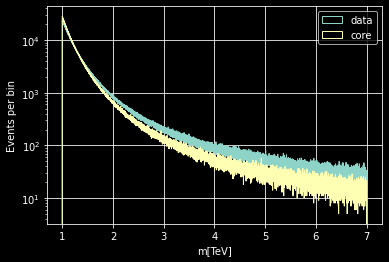

In [10]:
plt.style.use("dark_background")
(na, binsa, patchesa) = plt.hist(samplesa, log=True, bins=10000, label="data", histtype="step")
(nb, binsb, patchesb) = plt.hist(samplesb, log=True, bins=10000, label="core", histtype="step")
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [11]:
nbm = np.column_stack((nb, binsb[:nb.shape[0]]))

In [30]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
x_train, x_test, y_train, y_test = train_test_split(nbm, na, test_size=0.3)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 2)
(7000,)
(3000, 2)
(3000,)


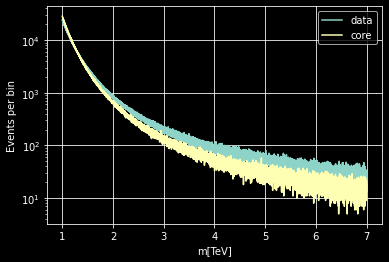

In [31]:
plt.yscale("log")
plt.plot(binsa[:na.shape[0]],na,label="data")
plt.plot(binsa[:nb.shape[0]],nb,label="core")
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

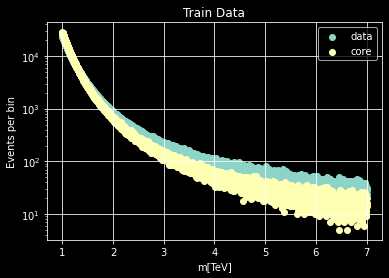

In [32]:
plt.yscale("log")
plt.title("Train Data")
plt.scatter(x_train[:y_train.shape[0],1],y_train,label="data")
plt.scatter(x_train[:y_train.shape[0],1],x_train[:,0],label="core")
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

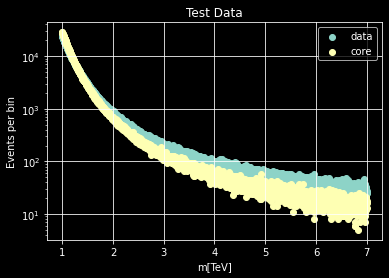

In [33]:
plt.yscale("log")
plt.title("Test Data")
plt.scatter(x_test[:y_test.shape[0],1],y_test,label="data")
plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],label="core")
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [14]:
#import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
#os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [34]:
def create_model(inx):
    # Create the model 
    model = keras.Sequential()
    model.add(keras.layers.Dense(units = 16, activation = 'linear', input_shape=[inx]))
    model.add(keras.layers.Dense(units = 64, activation = 'relu', kernel_regularizer='l1'))
    model.add(keras.layers.Dense(units = 128, activation = 'relu', kernel_regularizer='l1'))
    model.add(keras.layers.Dense(units = 128, activation = 'relu', kernel_regularizer='l1'))
    model.add(keras.layers.Dense(units = 64, activation = 'relu', kernel_regularizer='l1'))
    model.add(keras.layers.Dense(units = 1, activation = 'linear'))
    model.compile(loss='mse', optimizer="adam")

    # Display the model
    model.summary()

    return model

In [38]:
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, 
                                           patience=15, verbose=0,
                                           mode='auto', baseline=None,
                                           restore_best_weights=True)]

In [39]:
model_base = create_model(1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 34,273
Trainable params: 34,273
Non-trainable params: 0
__________________________________________________

In [40]:
model_base.fit(x_train[:,1], y_train, epochs=100, verbose=1, batch_size=32, callbacks=callbacks)

Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 9177106.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 2603164.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 269973.3438
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 74518.8984
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 31803.7344
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 22966.2324
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 18596.1250
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 10672.4551
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 8021.4399
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 7522.6377
Epoch 11/100
219/219 [==============================] - 0s 2ms/step - loss: 4533.7178
Epoch 12/100
219/219 [============================

In [61]:
y_hat = model_base.predict(x_test[:,1])

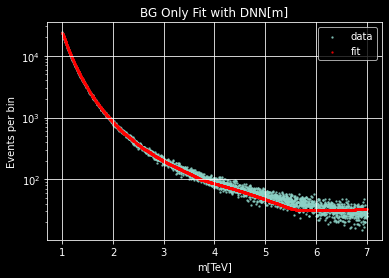

In [62]:
# Display the result
plt.title("BG Only Fit with DNN[m]")
plt.yscale("log")
plt.scatter(x_test[:y_test.shape[0],1],y_test,s=2,label="data",alpha=0.7)
#plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],s=2,label="core")
plt.scatter(x_test[:y_test.shape[0],1],y_hat,s=2,label="fit",color="red",alpha=0.7)
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [ ]:
binsm = np.linspace()

In [51]:
model_core1 = create_model(1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_19 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 34,273
Trainable params: 34,273
Non-trainable params: 0
__________________________________________________

In [52]:
model_core1.fit(x_train[:,0], y_train, epochs=100, verbose=1, batch_size=32, callbacks=callbacks)

Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 296446.7812
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 70448.6328
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 69549.3281
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 71072.0312
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 56355.6836
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 75740.7969
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 65763.1719
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 105381.7266
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 68731.9375
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 56481.2188
Epoch 11/100
219/219 [==============================] - 0s 2ms/step - loss: 66709.8984
Epoch 12/100
219/219 [============================

In [247]:
y_hat = model_core1.predict(x_test[:,0])

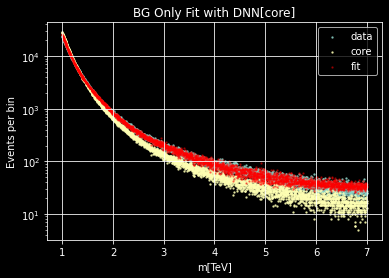

In [249]:
# Display the result
plt.title("BG Only Fit with DNN[core]")
plt.yscale("log")
plt.scatter(x_test[:y_test.shape[0],1],y_test,s=2,label="data",alpha=0.7)
plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],s=2,label="core",alpha=0.7)
plt.scatter(x_test[:y_test.shape[0],1],y_hat,s=2,label="fit",color="red",alpha=0.4)
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [55]:
model_core2 = create_model(2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_25 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 34,289
Trainable params: 34,289
Non-trainable params: 0
__________________________________________________

In [57]:
model_core2.fit(x_train, y_train, epochs=100, verbose=1, batch_size=32, callbacks=callbacks)

Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 340623.6875
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 73602.2578
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 58699.8750
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 66042.6953
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 69392.9219
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 61061.0664
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 67625.4453
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 78293.2188
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 61533.6133
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 52975.1602
Epoch 11/100
219/219 [==============================] - 0s 2ms/step - loss: 60346.5469
Epoch 12/100
219/219 [=============================

In [65]:
y_hat = model_core2.predict(x_test)

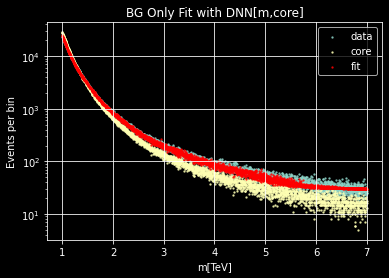

In [66]:
# Display the result
plt.title("BG Only Fit with DNN[m,core]")
plt.yscale("log")
plt.scatter(x_test[:y_test.shape[0],1],y_test,s=2,label="data",alpha=0.7)
plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],s=2,label="core",alpha=0.7)
plt.scatter(x_test[:y_test.shape[0],1],y_hat,s=2,label="fit",color="red",alpha=0.7)
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

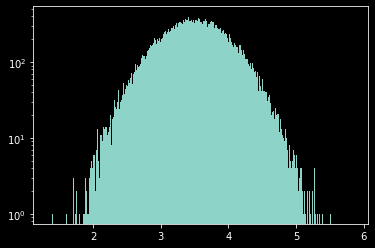

In [228]:
# add a gaussian signal at 3.5 TeV
# 100k signal vs 10m bg
sig_samples = gauss(300000, mean=3.5, std=0.5)
(ns, binss, patchess) = plt.hist(sig_samples, log=True, bins=3000)
plt.show()

In [205]:
print(ns.shape)

(3000,)


In [206]:
print(x_test.shape)
print(y_test.shape)

(3000, 2)
(3000,)


In [208]:
inds = np.digitize(x_test[:,1],np.linspace(x_test[:,1].min(),x_test[:,1].max(),2999))
indss = np.digitize(binss[:ns.shape[0]],np.linspace(x_test[:,1].min(),x_test[:,1].max(),2999))

In [1]:
# print(binss[1000:2000])
# print(indss[1000:2000])
# print(ns[1000:2000])

In [241]:
y_test_all = y_test[inds] + ns[inds]

In [242]:
print(y_test_all)

[  58. 1225.  204. ...  121.   84.  246.]


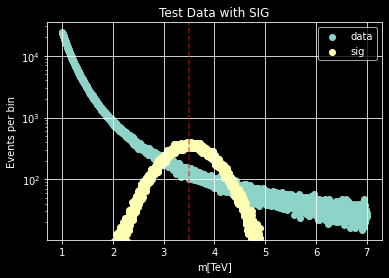

In [243]:
plt.yscale("log")
plt.title("Test Data with SIG")
plt.scatter(x_test[:y_test.shape[0],1],y_test,label="data")
plt.scatter(binss[:ns.shape[0]],ns,label="sig")
plt.axvline(x=3.5, alpha=0.6, linestyle="--", c='r')
#plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],label="core")
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [244]:
print(y_test_all.shape)

(3000,)


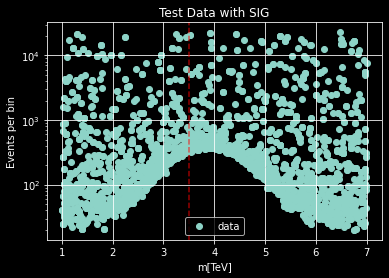

In [246]:
plt.yscale("log")
plt.title("Test Data with SIG")
plt.scatter(x_test[inds,1],y_test_all[inds],label="data")
#plt.scatter(binss[inds],ns[inds],label="data")
plt.axvline(x=3.5, alpha=0.6, linestyle="--", c='r')
#plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],label="core")
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()

In [229]:
all_samples = np.concatenate((samplesa, sig_samples))

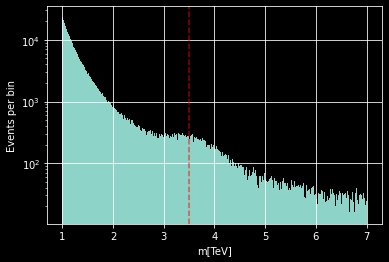

In [230]:
(n, bins, patches) = plt.hist(all_samples, log=True, bins=10000)
plt.grid()
plt.axvline(x=3.5, alpha=0.6, linestyle="--", c='r')
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.show()

In [232]:
y_hat = model_base.predict(bins)

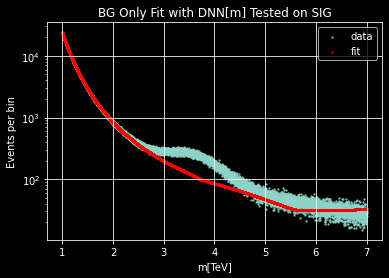

In [233]:
# Display the result
plt.title("BG Only Fit with DNN[m] Tested on SIG")
plt.yscale("log")
plt.scatter(bins[:n.shape[0]],n,s=2,label="data",alpha=0.7)
#plt.scatter(x_test[:y_test.shape[0],1],x_test[:,0],s=2,label="core")
plt.scatter(bins[:y_hat.shape[0]],y_hat,s=2,label="fit",color="red",alpha=0.7)
plt.grid()
plt.xlabel("m[TeV]")
plt.ylabel("Events per bin")
plt.legend()
plt.show()